<a href="https://colab.research.google.com/github/eunseochu/OB_9th/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8. 텍스트 분석**

### **6) 토픽 모델링(Topic Modeling) - 20 뉴스그룹**

#### **6-1) 토픽 모델링 소개**
토픽 모델링(Topic Modeling)이란 문서 집합에 숨어 있는 주제를 찾아내는 것
- 많은 양의 문서가 있을 때 사람이 이 문서를 다 읽고 핵심 주제를 찾는 것은 매우 많은 시간이 소모
- 머신러닝 기반의 토픽 모델링을 적용해 숨어 있는 중요 주제를 효과적으로 찾을 수 있음
- 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, <br/> 머신러닝 기반의 토픽 모델링은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출
- 토픽 모델링에 자주 사용되는 기법은 LSA(Latent Semantic Analysis)와 LDA(Latent Dirichlet Allocation)
  - 앞서 차원 축소의 LDA(Linear Discriminant Analysis)와 약어만 같을 뿐 서로 다른 알고리즘

#### **6-2) 토픽 모델링 실습 - 20 뉴스그룹 데이터 세트**

**20 뉴스그룹 데이터** <br/>
모토사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학의 8개 주제 추출 후 텍스트에 LDA 기반의 토픽 모델링 적용

**사이킷런 LDA 클래스** <br/>
사이킷런은 LDA 기반의 토픽 모델링을 LatentDirichletAllocation 클래스로 제공
- 초기 버전에는 LDA 토픽 모델링을 제공하지 않았으나 gensim과 같은 토픽 모델링 패키지가 인기를 끌면서 제공

**20개 중 8개의 주제 데이터 로드 및 Count기반 피처 벡터화** <br/>
- fetch_20newsgroups() API는 categories 파라미터를 통해 필요한 주제만 필터링 해 추출
- 추출된 텍스트를 Count 기반으로 벡터화 변환
  - LDA는 Count 기반의 벡터화만 사용
  - max_features = 1000으로 word 피처의 개수를 제한
  - ngram_range는 (1, 2)로 설정하고 피처 벡터화 변환

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 등 8개 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=0)

#LDA 는 Count기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


- CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터
- 이렇게 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링 수행

**LDA 객체 생성 후 Count 피처 벡터화 객체로 LDA수행** <br/>
LatentDirichletAllocation 클래스의 n_components 파라미터를 이용해 토픽 개수 조정
- random_state 값은 예제를 수행할 때마다 결과가 같게 하기 위해 입력

In [2]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

- LatentDirichletAllcation 객체는 components_ 속성값을 갖게 됨
  - components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가짐
  - 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 됨

**각 토픽 모델링 주제별 단어들의 연관도 확인**

In [3]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

- componnets_는 array[8, 400]으로 구성되어 있음
  - 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있음
  - components_array의 0번째 row, 10번째 col에 있는 값은 <br/> Topic #0에 대해 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 Topic #0에 연관되는 수치 값을 가짐
- lda_model.components_ 값만으로는 각 토픽별 word 연관도를 보기가 어려움
- display_topics() 함수를 만들어서 각 토픽별로 연관도가 높은 순으로 Word 나열

**각 토픽별 중심 단어 확인**

In [6]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes=topic.argsort()[::-1]
    top_indexes=topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_name에 해당하는 word feature 추출 후 join으로 concat
    feature_concat=' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names=count_vect.get_feature_names_out()

 #토픽별 가장 연관도가 높은 word를 15개 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


- Topic #0의 경우 명확하지 않고 일반적인 단어가 주를 이룸
- Topic #1의 경우 명확하게 컴퓨터 그래픽스 영역의 주제어가 추출
- Topic #2는 기독교에 관련된 주제어가 추출
- Topic #3의 경우는 의학에 관련된 주제어가 추출
- Topic #4는 윈도우 운영체제와 관련된 주제어가 추출
- Topic #5는 일반적인 단어로 주제어가 추출
- Topic #6은 중동 분쟁 등의 관련된 주제어가 추출
- Topic #7의 경우에는 애매하지만 윈도우 운영체제와 관련된 주제어가 일부 추출
  - Topic #0, Topic #5, Topic #7이 주로 애매한 주제어가 추출
  - 특히 모토사이클, 야구 주제의 경우 명확한 주제어가 추출되지 않음

### **8) 문서 유사도**

#### **8-1) 문서 유사도 측정 방법 - 코사인 유사도**
문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도(Cosine Similarity)를 사용
- 코사인 유사도는 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반
- 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용

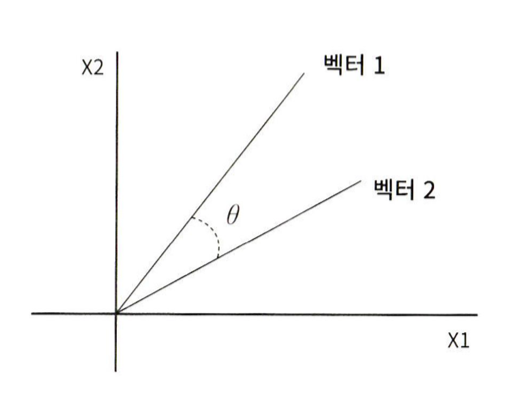

#### **8-2) 두 벡터 사잇각**
두 벡터의 사잇각에 따라 상호 관계는 다음과 같이 유사하거나 관련이 없거나 아예 반대 관계가 될 수 있음

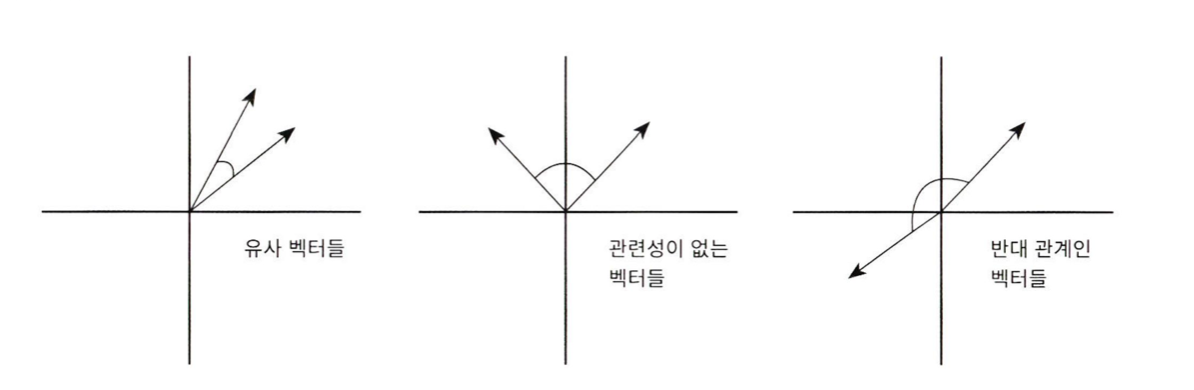

**두 벡터 A와 B의 코사인 값** <br/>
두 벡터 A와 B의 내적 값은 두 벡터의 크기를 곱한 값의 코사인 각도 값을 곱한 것

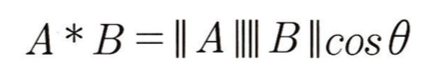

**유사도 cos𝜽** <br/>
두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것
- 즉, 내적 결과를 총 벡터 크기로 정규화(L2 Norm)한 것

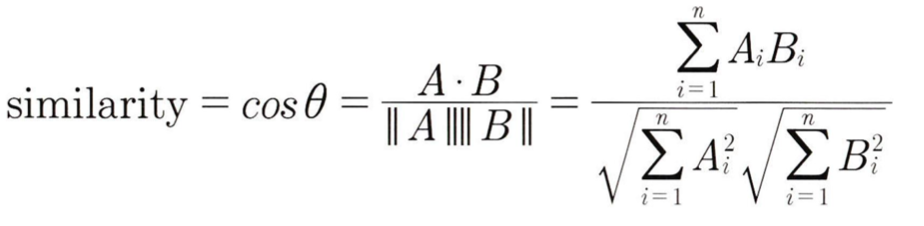

**코사인 유사도가 유사도 비교에 가장 많이 사용되는 이유** <br/>
- 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉽기 때문
  - 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉬움
  - 대표적인 문서와 문서 벡터 간의 크기에 기반한 유사도 지표로는 유클리드 거리 기반 지표가 있음
- 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없음
  - A 문서에서 '머신러닝'이라는 단어가 5번 언급되고 B문서에는 3번 언급됐을 때 <br/> A 문서가 '머신러닝'과 더 밀접하게 관련된 문서라고 쉽게 판단해서는 안됨
  - A 문서가 B 문서보다 10배 이상 크다면 오히려 B 문서가 '머신러닝'과 더 밀접하게 관련된 문서라 판단

**cos_similarity() 함수** <br/>
두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 함수

In [7]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

**TF-IDF로 벡터화된 행렬로 변환** <br/>
doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위함

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


**두 개 문서의 유사도 측정**
- 반환된 행렬은 희소 행렬이므로 앞에서 작성한 cos_similarity() 함수의 인자인 array로 만들기 위해 <Br/> 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환
  - feature_vect_dense[0]은 doc_list 첫 번째 문서의 피처 벡터화
  - feature_vect_dense[1]은 doc_list 두 번째 문서의 피처 벡터화

In [10]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


- 첫 번째 문장과 두 번째 문장의 코사인 유사도는 0.402

In [11]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


- 첫 번째 문장과 세 번째 문장의 코사인 유사도는 0.404
- 두 번째 문장과 세 번째 문장의 코사인 유사도는 0.456

**첫 번째 문서와 비교해 첫 번째 문서, 그리고 두 번째, 세 번째 문서의 유사도 측정**
- 사이킷런은 코사인 유사도를 측정하기 위해 sklearn.metrics.pairwise.cosine_similarity API 제공
- cosine_similarity() 함수는 두 개의 입력 파라미터를 받음
  - 첫 번째 파라미터는 비교 기준이 되는 문서의 피처 행렬, 두 번째 파라미터는 비교되는 문서의 피처 행렬
  - cosine_similarity()는 희소 행렬, 밀집 행렬 모두가 가능하며, 행렬 또는 배열 모두 가능
  - 앞에서 만든 cos_similarity() 함수와 같이 별도의 변환 작업이 필요 없음

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


- 첫 번째 유사도 값인 1은 비교 기준이 첫 번째 문서 자신에 대한 유사도 측정
  - 1이라는 값이 거슬린다면 비교 대상에서 feature_vect[1:]을 이용해 비교 기준 문서를 제외하면 됨
- 두 번째 유사도 값인 0.40207758은 첫 번째 문서와 두 번째 문서의 유사도 값
- 세 번째 유사도 값인 0.40425045는 첫 번째 문서와 두 번째 문서의 유사도 값

**쌍으로 코사인 유사도 값 계산** <br/>
cosine_similarity()는 쌍으로(pair) 코사인 유사도 값 제공
- 1번째 문서와 2, 3번째 문서의 코사인 유사도, 2번째 문서와 1, 3번째 문서의 코사인 유사도, <br/> 3번째 문서와 1, 2번째 문서의 코사인 유사도를 ndarray 형태로 제공

In [14]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


- cosine_similarity()의 반환 값은 (3, 3) 형태의 ndarray
  - 첫 번째 로우는 1번 문서와 2, 3 번째 문서의 코사인 유사도
  - 두 번째 로우는 2번 문서와 1, 3 번째 문서의 코사인 유사도
  - 세 번째 로우는 3번 문서와 1, 2 번째 문서의 코사인 유사도

#### **8-3) Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [18]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환. 
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환. 
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [32]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

path=r'/content/drive/MyDrive/OpinosisDataset/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

- 데이터 세트를 새롭게 DataFrame으로 로드하고 문서 군집화 적용
  - 이전 절에서 해당 문서의 군집화는 전자제품, 호텔, 자동차를 주제로 군집화
  - 이 중 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도 측정
- 문서를 피처 벡터화해 변환하면 문서 내 단어에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처의 값으로 벡터화
- 각 문서가 피처 벡터화된 데이터를 cosisne_simularity()를 이용해 상호 비교해 유사도 확인

**호텔 군집화 데이터 추출 후 TFidfVectorizer의 데이터 추출** <br/>
호텔을 주제로 군집화 된 데이터를 먼저 추출하고 이 데이터에 해당하는 TfidfVectorizer 데이터 추출
- 호텔 군집화 데이터를 기반으로 별도의 TF-IDF를 수행하지 않음
- 바로 위에서 TfidfVectorizer로 만들어진 데이터에서 그대로 추출
  - DataFrame 객체 변수인 document_df에서 먼저 호텔로 군집화된 문서의 인덱스를 추출
  - 추출된 인덱스를 이용해 TfidfVectorizer 객체 변수인 feature_vect에서 호텔로 군집화된 문서의 피처 벡터를 추출

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([0, 5, 7, 10, 15, 17, 18, 20, 24, 25, 34, 37, 39, 41, 47, 48], dtype='int64')
##### 비교 기준 문서명  /content/drive/MyDrive/OpinosisDataset/topics/rooms_swissotel_chicago  와 타 문서 유사도######
[[1.         0.25016153 0.44807817 0.28563594 0.12513566 0.24123696
  0.21975321 0.77312013 0.11313189 0.10470943 0.86779235 0.22029855
  0.2790587  0.39570558 0.149938   0.32619948]]


**첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 정렬 후 시각화**
- cosine_similarity()는 쌍 형태의 ndarray를 반환
- 판다스 인덱스로 이용하기 위해 reshape(-1)으로 차원 변경

가장 유사도가 큰 파일명 및 유사도:
 filename      /content/drive/MyDrive/OpinosisDataset/topics/...
similarity                                             0.867792
Name: 34, dtype: object


Text(0.5, 1.0, '/content/drive/MyDrive/OpinosisDataset/topics/rooms_swissotel_chicago')

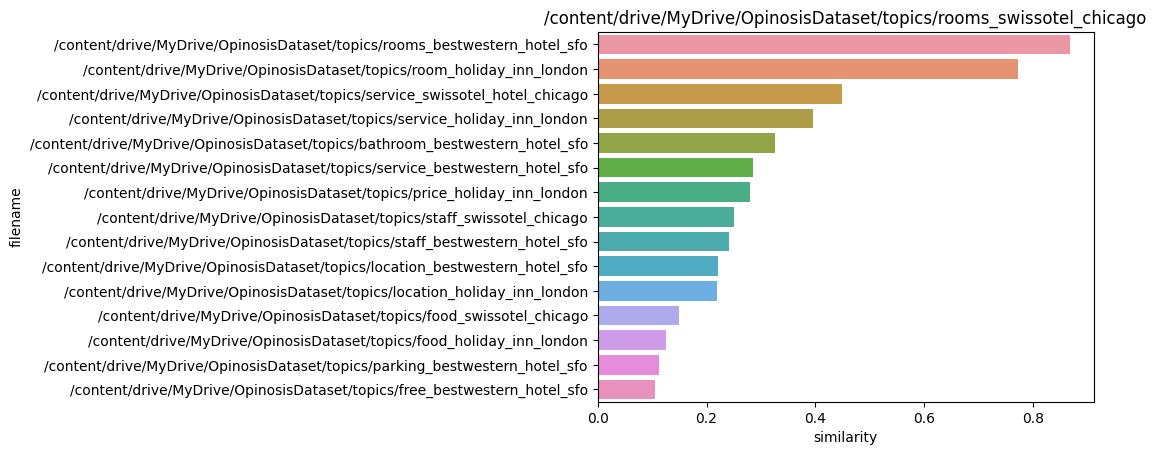

In [34]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0, :])

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

### **9) 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

#### **9-1) 한글 NLP 처리의 어려움**
한글 언어 처리는 '띄어쓰기'와 '다양한 조사'때문에 영어 등의 라틴어 처리보다 어려움
- 띄어쓰기를 잘못하면 의미가 왜곡되어 전달될 수 있음
  - 영어의 경우 띄어쓰기를 잘못하면 의미가 왜곡되는 게 아니라 잘못된 또는 없는 단어로 인식되는 게 대부분
  - 영어의 띄어쓰기는 매우 명확하므로 초등학생이라도 거의 완벽하게 띄어쓰기를 할 수 있음
  - 한글의 띄어쓰기는 고등교육을 받은 사람이라도 틀리는 경우가 종종 발생
- 조사는 주어나 목적어를 위해 추가되며, 워낙 경우의 수가 많기 대문에 어근 추출 등의 전처리 시 제거하기 까다로움
  - '집'이라는 어근 단어를 기준으로 집은, 집이, 집으로, 집에서 등 다양한 형태의 조사 존재
  - 집은의 '은'이 뜻하는 것이 조사인지 금속 은인지 구분하기도 어려움

#### **9-2) KoNLPy 소개**
파이썬의 대표적인 형태소 패키지

**형태소란?** <br/>
형태소는 '단어로서 의미를 가지는 최소 단위'로 정의
- 형태소 분석이란 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅을 부착하는 작업을 지칭

**KoNLPy 패키지** <br/>
KoNLPy 이전에는 파이썬 기반의 형태소 분석 프로그램이 거의 존재하지 않음
- 대부분의 형태소 분석은 C++과 Java 기반 패키지로 개발
- KoNLPy는 기존의 C/C++, Java로 잘 만들어진 형태소 엔진을 파이썬 래퍼 기반으로 재작성한 패키지
  - 기존의 엔진은 그대로 유지한 채 파이썬 기반에서 인터페이스를 제공
  - 검증된 패키지의 안정성을 유지
  - 꼬꼬마, 한나눔, Komoran, 은전한닢 프로젝트, Twitter와 같이 5개의 형태소 분석 모듈 모두 사용 가능
  - Mecab의 경우 윈도우 환경에서는 구동되지 않으며, 리눅스 환경의 KoNLPy에서만 가능

**데이터 로딩**

In [35]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 32.2 MB/s eta 0:00:00


In [36]:
from konlpy.tag import Twitter
from konlpy.tag import Okt
from konlpy.tag import Kkma

In [39]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 컬럼 분리 문자 \t 
train_df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', sep='\t')
train_df.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


**학습 데이터 세트의 0과 1의 Label 값 비율**

In [40]:
train_df['label'].value_counts( )

0    75173
1    74827
Name: label, dtype: int64

- 0과 1의 비율이 어느 한쪽으로 치우치지 않고 균등한 분포

**데이터 가공** <br/>
train_df와 test_df에 동일한 데이터 가공 수행
- 리뷰 텍스트를 가지는 'document'칼럼에 Null이 일부 존재하므로 이 값은 공백으로 변환
- 문자가 아닌 숫자의 경우 단어적인 의미로 부족하므로 파이썬의 정규 표현식 모듈인 re를 이용해 공백으로 변환

In [41]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환. 
test_df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# id 컬럼 삭제 수행. 
train_df.drop('id', axis=1, inplace=True) 
test_df.drop('id', axis=1, inplace=True)

**형태소 단어로 토큰화** <br/>
TF-IDF 방식으로 단어를 벡터화하기 이전, 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화
- 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스 이용
- Twitter 객체의 morphs() 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환
- 문장을 형태소 단어 형태로 반환하는 별도의 tokenizer 함수를 tw_tokenizer()라는 이름으로 생성
  - 뒤에서 사이킷런의 TfidfVectorizer 클래스의 tokenizer로 사용

In [42]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

**TF-IDF 피처 모델 생성** <br/>
사이킷런의 TfidfVecotrizer를 이용해 TF-IDF 피처 모델을 생성
- Tokenizer는 위에서 만든 tw_tokenizer() 함수를 이용
- ngram은 (1,2), min_df = 3, max_df는 상위 90%로 제한

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

**로지스틱 회귀를 이용해 분류 기반의 감성 분석 수행** <br/>
로지스틱 회귀의 하이퍼 파라미터 C의 최적화를 위해 GridSearchCV 이용

In [44]:
# Logistic Regression 을 이용하여 감성 분석 Classification 수행. 
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# Parameter C 최적화를 위해 GridSearchCV 를 이용. 
params = { 'C': [1 ,3.5, 4.5, 5.5, 10 ] }
grid_cv = GridSearchCV(lg_clf , param_grid=params , cv=3 ,scoring='accuracy', verbose=1 )
grid_cv.fit(tfidf_matrix_train , train_df['label'] )
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


- C가 3.5일때 최고 0.8593의 정확도를 보임

In [45]:
test_df.head()

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,D만 아니었어도 별 다섯 개 줬을텐데.. 왜 D로 나와서 제 심기를 불편하게 하죠??,0


**테스트 세트를 이용해 최종 감성 분석 예측 수행** <br/>
테스트 세트를 이용해 예측할 때에는 학습할 때 적용한 TfidfVectorizer를 그대로 사용
- 학습 시 설정된 TfidfVectorizer의 피처 개수가 테스트 데이터를 TfidfVectorizer로 변환할 피처 개수 같아짐
- 학습 데이터에 사용된 tfidf_vect를 이용해 transform()을 테스트 데이터의 document 칼럼에 수행

In [47]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환.
tfidf_matrix_test=tfidf_vect.transform(test_df['document'])

# classifier는 gridsearchcv에서 최적 파라미터로 학습된 calssifier를 그대로 이용
best_estimator=grid_cv.best_estimator_
preds=best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86172
